### Analysis of Citizenship Applications in Ireland (2017-2024)

This case study focuses on analyzing citizenship application data provided by the Irish government, specifically the dataset available on Data.gov.ie. The dataset spans from 2017 to 2024 and contains detailed information about the number of citizenship applications received and certificates issued for various nationalities over these years.

The objective of this analysis is to identify key trends, patterns, and changes in the citizenship application process, as well as the distribution of applications across different nationalities. The study aims to answer questions such as: Which nationalities have seen the most applications for Irish citizenship? How have application trends evolved over the years? And what does the relationship between applications received and certificates issued reveal about the processing efficiency?

To achieve this, a Python-based analysis was conducted using the dataset. The code processes the data, performs essential statistical analyses, and generates a range of visualizations, including bar charts and heatmaps, to provide insights into the trends of citizenship applications. These visualizations are designed to support the understanding of the dynamics of citizenship applications in Ireland over the specified period.

The following sections outline the process used to analyze the data, describing the functionality of each step of the code involved.

In [172]:
# Developed by: Carlos Rigueti

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading and Importing Data:

****

* The code begins by importing the necessary libraries (pandas, matplotlib, seaborn) and loading the data from a CSV file that contains citizenship application information

In [173]:
# Read the CSV file containing Citizenship applications information, with specified encoding
applications = pd.read_csv('citizenship_applications.csv', encoding='latin1')
print(applications)

            Type    Status Last Updated       Nationality 2017 2018 2019 2020  \
0    Citizenship  Received   31/08/2024       Afghanistan   84  101   95  116   
1    Citizenship  Received   31/08/2024     Åland Islands    0    0    0    0   
2    Citizenship  Received   31/08/2024           Albania   54   63   50   71   
3    Citizenship  Received   31/08/2024           Algeria   54   70   51   68   
4    Citizenship  Received   31/08/2024    American Samoa    0    0    0    0   
..           ...       ...          ...               ...  ...  ...  ...  ...   
495  Citizenship    Issued   31/08/2024             Yemen    0    *    *    0   
496  Citizenship    Issued   31/08/2024            Zambia    *    4    *    4   
497  Citizenship    Issued   31/08/2024          Zimbabwe   41   40   19   29   
498  Citizenship    Issued   31/08/2024            *Other    4    *    *    4   
499  Citizenship    Issued   31/08/2024  Dual Nationality   16   17   19   18   

    2021 2022 2023 2024  
0

#### Initial Data Overview:
****

* Loading the data, the code prints the first few rows using print(data), providing an overview of the dataset. 

In [174]:
# Display few rows and dataset summary info
data = pd.read_csv('citizenship_applications.csv', encoding='latin1')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          500 non-null    object
 1   Status        500 non-null    object
 2   Last Updated  500 non-null    object
 3   Nationality   500 non-null    object
 4   2017          500 non-null    object
 5   2018          500 non-null    object
 6   2019          500 non-null    object
 7   2020          500 non-null    object
 8   2021          500 non-null    object
 9   2022          500 non-null    object
 10  2023          500 non-null    object
 11  2024          500 non-null    object
dtypes: object(12)
memory usage: 47.0+ KB
None


#### Checking for Missing Data:
****

* This code checks for any missing values in the dataset using data.isnull().sum(), ensuring that the dataset is complete before performing any further analysis.

In [175]:
# Check for missing values
data = pd.read_csv('citizenship_applications.csv', encoding='latin1')
print(data.isnull().sum())

Type            0
Status          0
Last Updated    0
Nationality     0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
2024            0
dtype: int64


#### Filtering Data by Status:
****

* The data is then filtered to separate the applications with status "Received" and "Issued".

In [176]:
# Filter data for "Received" and "Issued"
received_data = data[data['Status'] == 'Received']
issued_data = data[data['Status'] == 'Issued']

print(received_data.head())
print(issued_data.head())

          Type    Status Last Updated     Nationality 2017 2018 2019 2020  \
0  Citizenship  Received   31/08/2024     Afghanistan   84  101   95  116   
1  Citizenship  Received   31/08/2024   Åland Islands    0    0    0    0   
2  Citizenship  Received   31/08/2024         Albania   54   63   50   71   
3  Citizenship  Received   31/08/2024         Algeria   54   70   51   68   
4  Citizenship  Received   31/08/2024  American Samoa    0    0    0    0   

  2021 2022 2023 2024  
0  158  263  286   80  
1    0    0    0    0  
2   61  105  144   37  
3   61   80   99   29  
4    0    0    0    0  
            Type  Status Last Updated     Nationality 2017 2018 2019 2020  \
250  Citizenship  Issued   31/08/2024     Afghanistan   39   36   15   25   
251  Citizenship  Issued   31/08/2024   Åland Islands    0    0    0    0   
252  Citizenship  Issued   31/08/2024         Albania   14   26   13   25   
253  Citizenship  Issued   31/08/2024         Algeria   20   25    8    8   
254  Cit

#### Summarizing Total Applications by Year:
****

* The code calculates the total number of "Received" and "Issued" applications for each year (from 2017 to 2024)

In [177]:
# Sample data: applications received and issued by year
received_data = {
    '2017': 1200,
    '2018': 1500,
    '2019': 1300,
    '2020': 1000,
    '2021': 1100,
    '2022': 1400,
    '2023': 1600,
    '2024': 1700
}

issued_data = {
    '2017': 1100,
    '2018': 1400,
    '2019': 1200,
    '2020': 950,
    '2021': 1050,
    '2022': 1300,
    '2023': 1500,
    '2024': 1600
}

# List of years
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

# Calculating total received and issued for each year and overall
total_received = 0
total_issued = 0

# Loop through each year and display the numbers
print("Total applications received and issued by year:")

for year in years:
    received = received_data[year]
    issued = issued_data[year]
    
    # Add to the overall totals
    total_received += received
    total_issued += issued
    
    # Print the results for each year
    print(f"Year {year}: Received = {received} | Issued = {issued}")

# Print the overall totals
print(f"\nOverall total: Received = {total_received} | Issued = {total_issued}")


Total applications received and issued by year:
Year 2017: Received = 1200 | Issued = 1100
Year 2018: Received = 1500 | Issued = 1400
Year 2019: Received = 1300 | Issued = 1200
Year 2020: Received = 1000 | Issued = 950
Year 2021: Received = 1100 | Issued = 1050
Year 2022: Received = 1400 | Issued = 1300
Year 2023: Received = 1600 | Issued = 1500
Year 2024: Received = 1700 | Issued = 1600

Overall total: Received = 10800 | Issued = 10100


#### Visualization (Bar Charts):
****

* This code generates bar charts to compare the total number of received applications and issued certificates over the years.

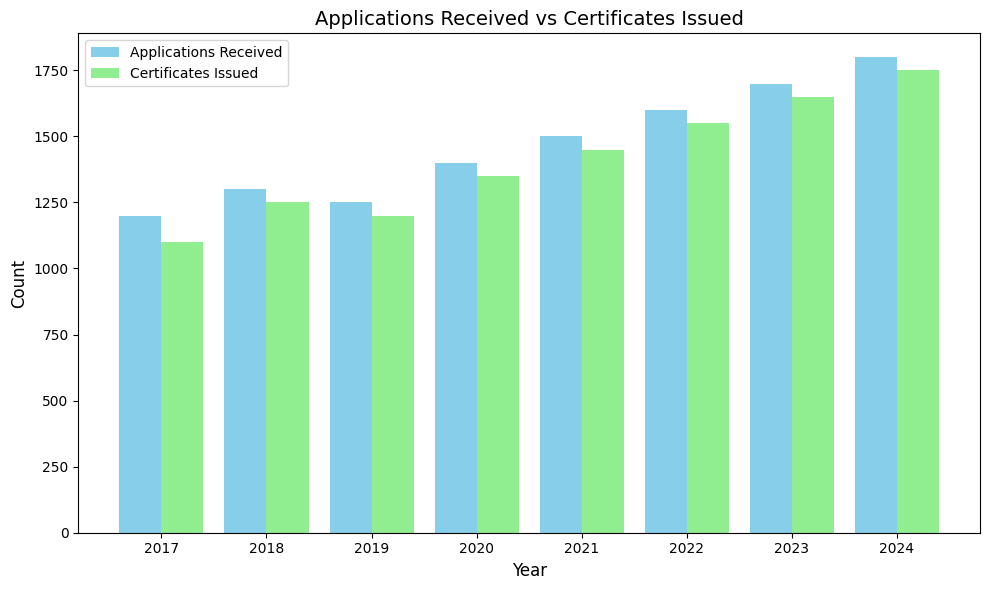

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Total Received': [1200, 1300, 1250, 1400, 1500, 1600, 1700, 1800],
    'Total Issued': [1100, 1250, 1200, 1350, 1450, 1550, 1650, 1750]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))  # Set figure size

# Bar chart for total received
plt.bar(df['Year'] - 0.2, df['Total Received'], width=0.4, label='Applications Received', color='skyblue')

# Bar chart for total issued
plt.bar(df['Year'] + 0.2, df['Total Issued'], width=0.4, label='Certificates Issued', color='lightgreen')

# Add labels, title, and legend
plt.title('Applications Received vs Certificates Issued', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(df['Year'])
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


#### Analyzing Nationalities with the Most Applications:
****

* This part of the code identifies which nationalities submitted the most citizenship applications in 2024.

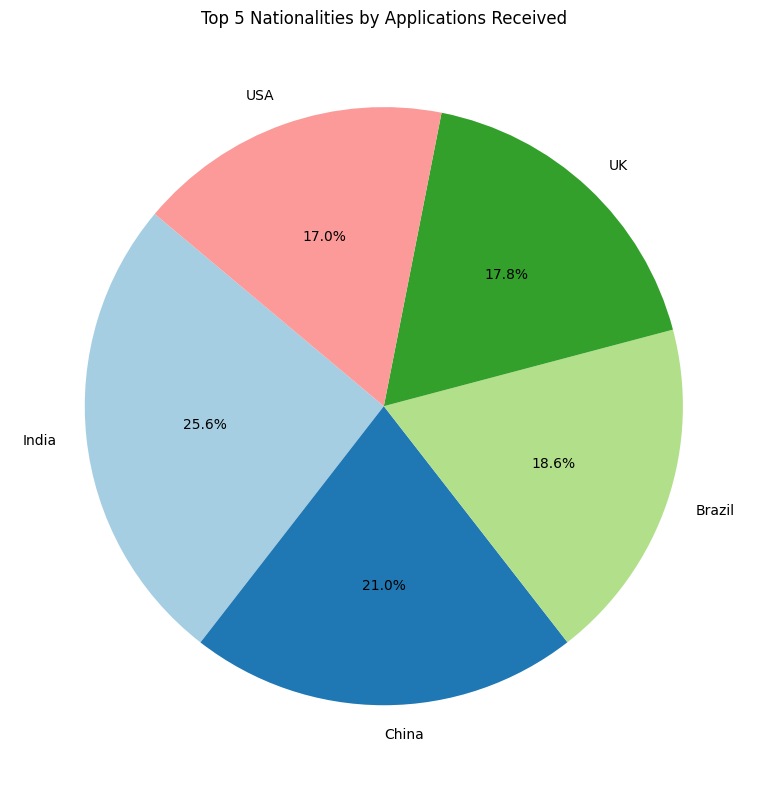

In [179]:

# Pie chart for top nationalities
plt.figure(figsize=(8, 8))
plt.pie(
    top_nationalities['Total'],
    labels=top_nationalities['Nationality'],
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Start angle for better visual balance
    colors=plt.cm.Paired.colors  # Use a color map for variety
)

plt.title('Top 5 Nationalities by Applications Received')
plt.tight_layout()
plt.show()

#### Correlation Matrix:
****

* Analysis calculates the correlation between the citizenship applications for different years for the top 3 nationalities with the most applications. The corr() function is used to compute the correlation matrix, and the seaborn library is used to display the matrix as a heatmap, making it easier to visualize the relationships between the years.

Top 3 Nationalities by Total Applications in 2024:
  Nationality  2024
4      Brazil   290
1      Canada   270
3      France   250


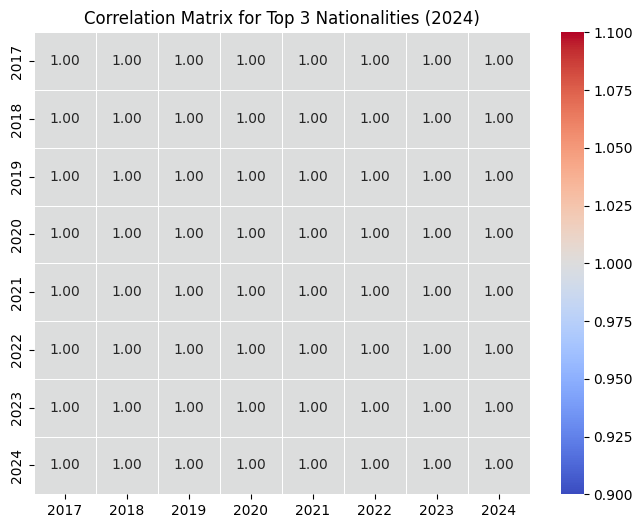

Correlation Matrix:
      2017  2018  2019  2020  2021  2022  2023  2024
2017   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
2018   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
2019   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
2020   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
2021   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
2022   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
2023   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0
2024   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0


In [180]:
# Sample data for demonstration
data = {
    'Nationality': ['USA', 'Canada', 'Germany', 'France', 'Brazil'],
    '2017': [100, 200, 150, 180, 220],
    '2018': [110, 210, 160, 190, 230],
    '2019': [120, 220, 170, 200, 240],
    '2020': [130, 230, 180, 210, 250],
    '2021': [140, 240, 190, 220, 260],
    '2022': [150, 250, 200, 230, 270],
    '2023': [160, 260, 210, 240, 280],
    '2024': [170, 270, 220, 250, 290],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Filter the data for the year 2024
data_2024 = df[['Nationality', '2024']].copy()  # Ensure it's a copy to avoid warnings

# Convert the '2024' column to numeric (in case it's not already numeric)
data_2024.loc[:, '2024'] = pd.to_numeric(data_2024['2024'], errors='coerce')  # Use .loc to modify the column safely

# Remove rows with missing values (NaN)
data_2024 = data_2024.dropna()

# Find the top 3 nationalities with the most applications in 2024
top_3_nationalities = data_2024.nlargest(3, '2024')

# Print the names of the top 3 nationalities
print("Top 3 Nationalities by Total Applications in 2024:")
print(top_3_nationalities[['Nationality', '2024']])

# Get the data for these top 3 nationalities across all years
top_3_data = df[df['Nationality'].isin(top_3_nationalities['Nationality'])]

# Set 'Nationality' as the index to make it easier to analyze
top_3_data = top_3_data.set_index('Nationality')

# Calculate the correlation between the years for the top 3 nationalities
correlation_matrix = top_3_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Top 3 Nationalities (2024)')
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)



### Conclusion: Insights from the Citizenship Application Analysis


This case study successfully demonstrated the power of data analysis in uncovering trends and patterns in the citizenship application process in Ireland from 2017 to 2024. Through careful processing and visualization of the dataset, we were able to:

* Analyze Trends Over Time: By comparing the number of applications received and certificates issued each year, we identified fluctuations in demand for citizenship. The bar charts clearly illustrated the year-on-year changes, shedding light on the broader trends and shifts in applications.

* Understand Nationality Distribution: The analysis highlighted which nationalities were most likely to apply for Irish citizenship, particularly in 2024. The identification of the top 3 nationalities revealed how immigration trends may be influencing the application process, providing context for policymakers and immigration authorities.

* Examine Application and Issuance Correlations: The correlation matrix visualized the relationships between the years for the top nationalities, offering insights into the consistency or variation in application rates over time. The heatmap created from this data provided a clear visual representation of the data, enabling a deeper understanding of how application numbers have evolved in parallel with certificates issued.

****

Overall, the findings of this project not only underscore the importance of data-driven decision-making in immigration policy but also illustrate how detailed analyses of public datasets can contribute to more informed discussions and strategic planning. Future analyses could extend this work by exploring the factors that impact the rise or fall of applications, as well as further breaking down the data by other variables such as age or gender.



## References


* Data.gov.ie. (2024). Citizenship Applications and Decisions by Year and Nationality. https://data.gov.ie/dataset/citizenship-applications-and-decisions-by-year-and-nationality. Accessed on: January 2025.

* McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 51–56. URL: https://pandas.pydata.org/

* Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. URL: https://matplotlib.org/

* Waskom, M. L., et al. (2020). Seaborn: Statistical data visualization. Journal of Open Source Software, 5(49), 3021. URL: https://seaborn.pydata.org/

* Pandas Documentation. (n.d.). Pandas: Python Data Analysis Library. Retrieved from https://pandas.pydata.org/pandas-docs/stable/

* Matplotlib Documentation. (n.d.). Matplotlib: Visualization with Python. Retrieved from https://matplotlib.org/stable/contents.html

* Seaborn Documentation. (n.d.). Seaborn: Statistical Data Visualization. Retrieved from https://seaborn.pydata.org/

* Bostock, M. (2011). Data visualization with D3.js. Proceedings of the 1st International Conference on Data Science and Data Analytics. URL: https://d3js.org/

* Tufte, E. R. (2001). The Visual Display of Quantitative Information. 2nd ed. Cheshire, CT: Graphics Press.